In [48]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [49]:
# Data Reading 

import os
from glob import glob
from PIL import Image



In [50]:
# Data Processing 

import numpy as np
import pandas as pd
import cv2
import random
import albumentations as A

In [51]:
# Data Analysis

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Data Modeling & Model Evaluation

from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from tensorflow.keras import layers, models
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score, precision_score, f1_score

In [53]:
# Grad-CAM

import keras
import matplotlib.cm as cm


In [141]:
# Reading the data
# This method is basically assigining negative result to the Normal images in the directory 
# C:\Users\hp\Desktop\MinorProject\COVID-19_Radiography_Dataset\Normal
# Also it is assigning positive result to the COVID images in the directory
# C:\Users\hp\Desktop\MinorProject\COVID-19_Radiography_Dataset\COVID
levels = ['Viral_Pneumonia','COVID','Normal','Lung_Opacity']
path = "C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset"
data_dir = os.path.join(path)

data = []
for id, level in enumerate(levels):
    for file in os.listdir(os.path.join(data_dir, level)):
        data.append(['{}/{}'.format(level, file), level])

data = pd.DataFrame(data, columns = ['image_file', 'Result'])

data['path'] = path + '/' + data['image_file']
data['Result'] = data['Result'].map({'Normal': 'Non_Covid', 'COVID': 'Positive','Lung_Opacity': 'Non_Covid','Viral_Pneumonia': 'Viral_Pneumonia'})

data.head()

# data.sample()
# The above method is similar to training model.

,image_file,Result,path
0,Viral_Pneumonia/Viral Pneumonia-1.png,Viral_Pneumonia,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...
1,Viral_Pneumonia/Viral Pneumonia-10.png,Viral_Pneumonia,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...
2,Viral_Pneumonia/Viral Pneumonia-2.png,Viral_Pneumonia,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...
3,Viral_Pneumonia/Viral Pneumonia-3.png,Viral_Pneumonia,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...
4,Viral_Pneumonia/Viral Pneumonia-4.png,Viral_Pneumonia,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...


In [142]:
# Printing the number of duplicated samples and the total number of samples.
print('Number of Duplicated Samples: %d'%(data.duplicated().sum()))
print('Number of Total Samples: %d'%(data.isnull().value_counts()))

Number of Duplicated Samples: 0
Number of Total Samples: 40


# EXPLORATORY DATA ANALYSIS

In [143]:
# Count Plot
# Showing the count of the plot and showing the number of covid positive and negative cases.
df = pd.DataFrame()
df['Result'] = ['Positive','Viral_Pneumonia','Non_Covid']
df['Count'] = [len(data[data['Result'] == 'Positive']),len(data[data['Result'] == 'Viral_Pneumonia']), len(data[data['Result'] == 'Non_Covid'])]
df = df.sort_values(by = ['Count'], ascending = False)

fig = px.bar(df, x = 'Result', y = 'Count', 
             color = "Result", text_auto='', width = 600, 
             color_discrete_sequence = ["orange", "purple","blue"],
             template = 'plotly_dark')

fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_traces(textfont_size = 12, textangle = 0, textposition = "outside", cliponaxis = False)

fig.show()

In [144]:
#Image Samples
data['image'] = data['path'].map(lambda x: np.asarray(Image.open(x).resize((75,75))))

data.head()

,image_file,Result,path,image
0,Viral_Pneumonia/Viral Pneumonia-1.png,Viral_Pneumonia,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[1, 3, 16, 26, 37, 53, 64, 78, 112, 129, 140,..."
1,Viral_Pneumonia/Viral Pneumonia-10.png,Viral_Pneumonia,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[21, 27, 27, 28, 45, 29, 26, 26, 23, 20, 16, ..."
2,Viral_Pneumonia/Viral Pneumonia-2.png,Viral_Pneumonia,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[74, 98, 141, 140, 143, 147, 147, 150, 156, 1..."
3,Viral_Pneumonia/Viral Pneumonia-3.png,Viral_Pneumonia,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[28, 37, 49, 55, 58, 60, 106, 117, 106, 111, ..."
4,Viral_Pneumonia/Viral Pneumonia-4.png,Viral_Pneumonia,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[0, 2, 6, 15, 29, 51, 81, 103, 134, 157, 168,..."


[[[170 170 170]
  [141 141 141]
  [114 114 114]
  ...
  [ 91  91  91]
  [ 92  92  92]
  [ 93  93  93]]

 [[168 168 168]
  [139 139 139]
  [112 112 112]
  ...
  [ 60  60  60]
  [ 61  61  61]
  [ 63  63  63]]

 [[166 166 166]
  [137 137 137]
  [111 111 111]
  ...
  [ 39  39  39]
  [ 40  40  40]
  [ 41  41  41]]

 ...

 [[ 41  41  41]
  [ 28  28  28]
  [ 19  19  19]
  ...
  [  3   3   3]
  [  6   6   6]
  [ 13  13  13]]

 [[ 43  43  43]
  [ 30  30  30]
  [ 21  21  21]
  ...
  [  3   3   3]
  [  6   6   6]
  [ 13  13  13]]

 [[ 44  44  44]
  [ 33  33  33]
  [ 24  24  24]
  ...
  [  3   3   3]
  [  6   6   6]
  [ 13  13  13]]]
[[[  3   3   3]
  [  3   3   3]
  [  3   3   3]
  ...
  [  4   4   4]
  [  4   4   4]
  [  4   4   4]]

 [[  3   3   3]
  [  3   3   3]
  [  3   3   3]
  ...
  [  4   4   4]
  [  4   4   4]
  [  4   4   4]]

 [[  3   3   3]
  [  3   3   3]
  [  3   3   3]
  ...
  [  4   4   4]
  [  4   4   4]
  [  4   4   4]]

 ...

 [[217 217 217]
  [217 217 217]
  [216 216 216]
  ..

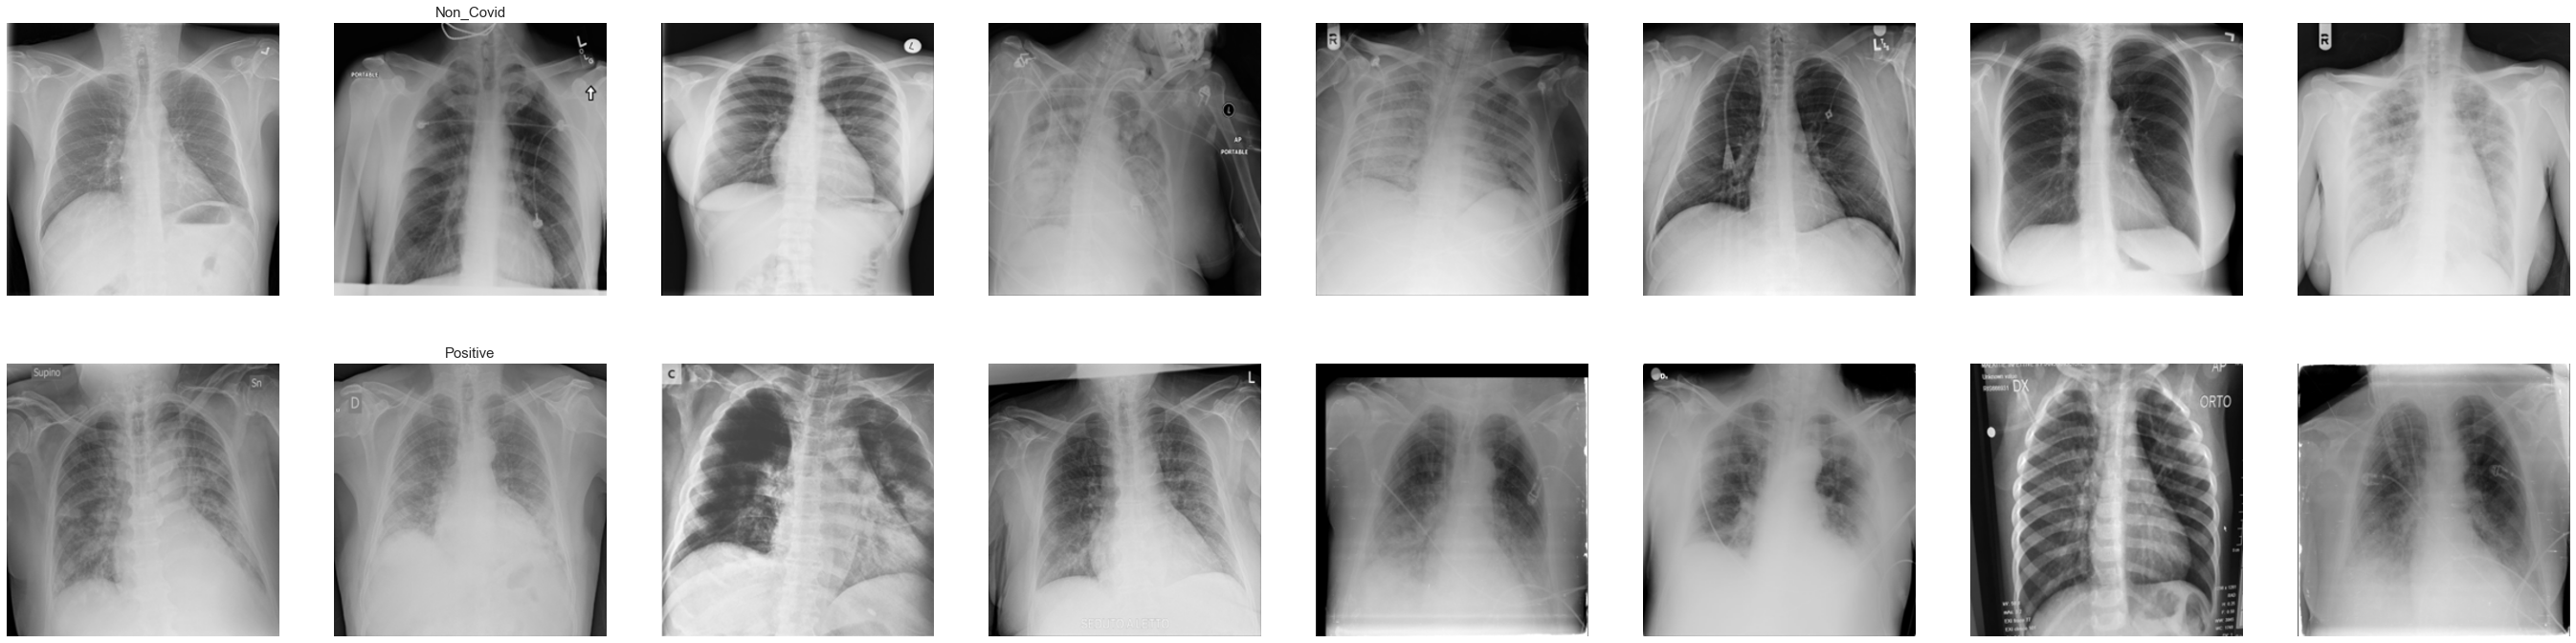

In [145]:
# In 2-d-matrix form showing the pixel values of the image.
n_samples = 8

fig, m_axs = plt.subplots(2, n_samples, figsize = (6*n_samples, 3*4))

for n_axs, (type_name, type_rows) in zip(m_axs, data.sort_values(['Result']).groupby('Result')):
    n_axs[1].set_title(type_name, fontsize = 15)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state = 1234).iterrows()):       
        picture = c_row['path']
        image = cv2.imread(picture)
#imread converts the image in the matrix form of its pixels here 2-d matrix
        print(image)
        c_ax.imshow(image)
        c_ax.axis('off')

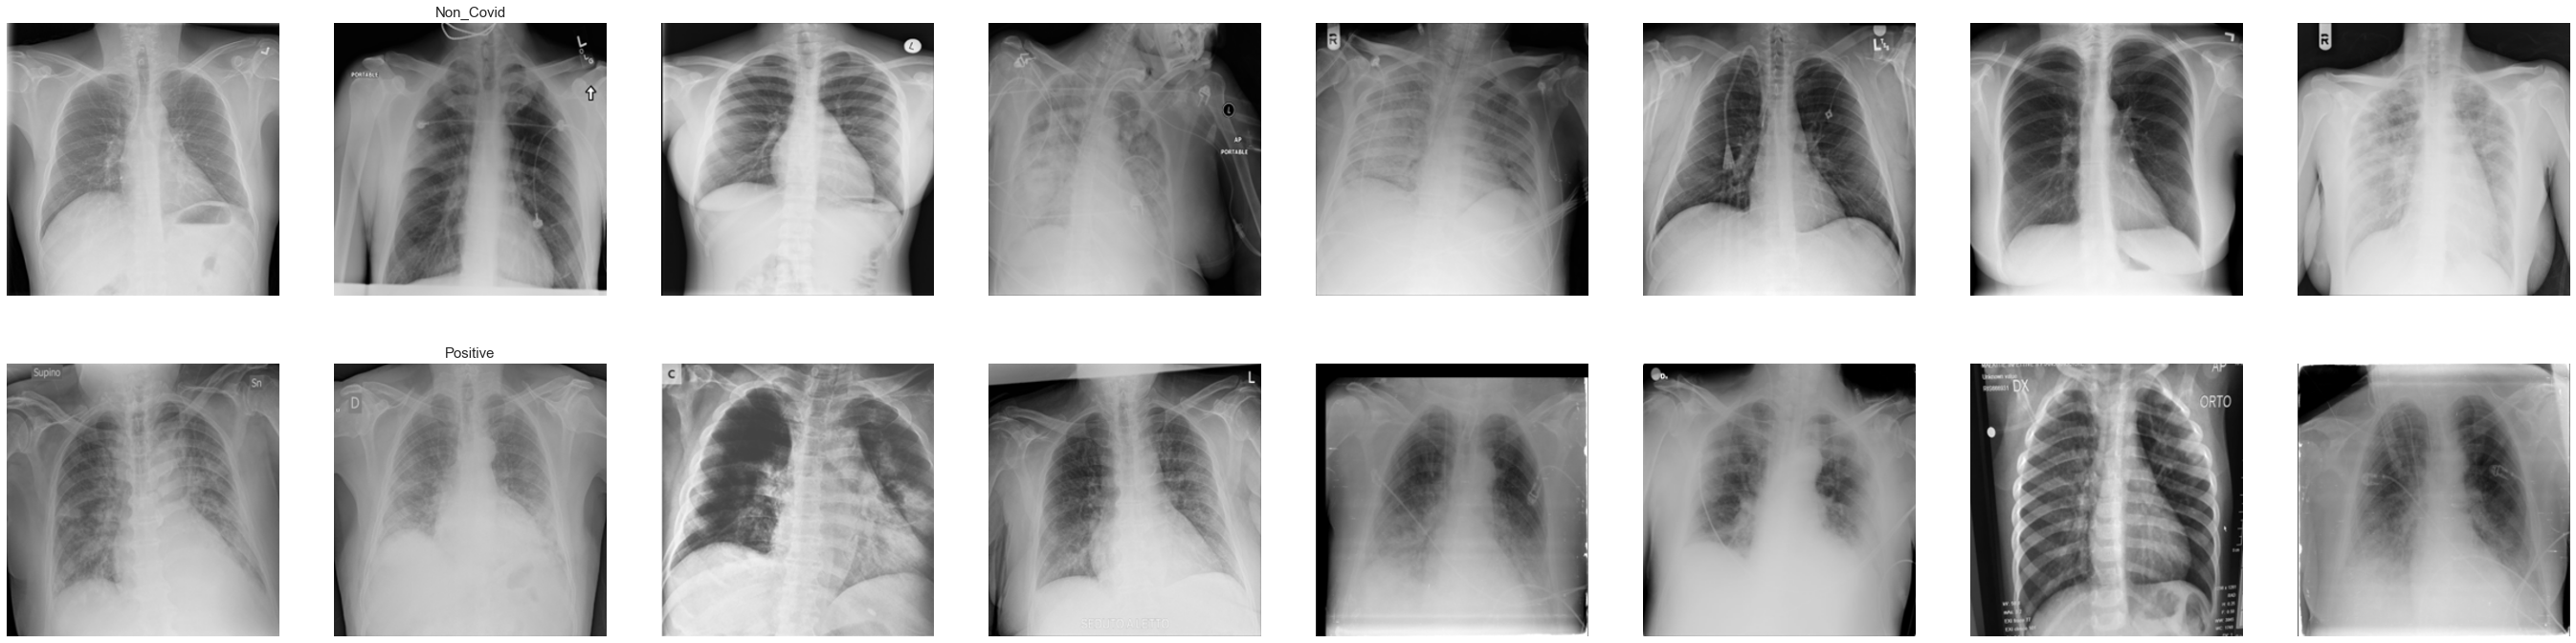

In [74]:
#Basically displaying some data samples tagged as positive and negative.
n_samples = 8

fig, m_axs = plt.subplots(2, n_samples, figsize = (6*n_samples, 3*4))

for n_axs, (type_name, type_rows) in zip(m_axs, data.sort_values(['Result']).groupby('Result')):
    n_axs[1].set_title(type_name, fontsize = 15)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state = 1234).iterrows()):       
        picture = c_row['path']
        image = cv2.imread(picture)
#         print(image)
        c_ax.imshow(image)
    # Simply shows the image
        c_ax.axis('off')

In [75]:
#Random Image Analysis
# plt.figure()
# image = cv2.imread("C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset/COVID/COVID-1002.png")
# plt.imshow(image)
# plt.axis('off')
# plt.show()

In [146]:
# the below features is for this image image = cv2.imread
#("C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset/COVID/COVID-1002.png")
print('Image Shape: {}'.format(image.shape))
print('Image Height: {}'.format(image.shape[0]))
print('Image Width: {}'.format(image.shape[1]))
print('Image Dimension: {}'.format(image.ndim))
print('Image Size: {}kb'.format(image.size//1024))
print('Image Data Type: {}'.format(image.dtype))
print('Maximum RGB value of the image: {}'.format(image.max()))
print('Minimum RGB value of the image: {}'.format(image.min()))

Image Shape: (299, 299, 3)
Image Height: 299
Image Width: 299
Image Dimension: 3
Image Size: 261kb
Image Data Type: uint8
Maximum RGB value of the image: 255
Minimum RGB value of the image: 0


In [77]:
# B-channel
# Basically turn the B channel as 0 in R,G,B three channels
# the below features is for this image image = cv2.imread
#("C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset/COVID/COVID-1002.png")
# plt.title('B channel', fontsize = 14)
# plt.imshow(image[ : , : , 0])
# plt.axis('off');
# plt.show()

In [147]:
# Ben Grahams Method
# First, we convert the images to greyscale and then apply Gaussian blur to them.
all_covid = []
all_normal = []
all_viral_pneumonia = []

all_normal.extend(glob(os.path.join(path, "Normal/*.png")))
all_normal.extend(glob(os.path.join(path, "Lung_Opacity/*.png")))
all_viral_pneumonia.extend(glob(os.path.join(path, "Viral_Pneumonia/*.png")))
all_covid.extend(glob(os.path.join(path, "COVID/*.png")))

random.shuffle(all_normal)
random.shuffle(all_viral_pneumonia)
random.shuffle(all_covid)

images = all_normal[:50] + all_covid[:50] + all_viral_pneumonia[:50]

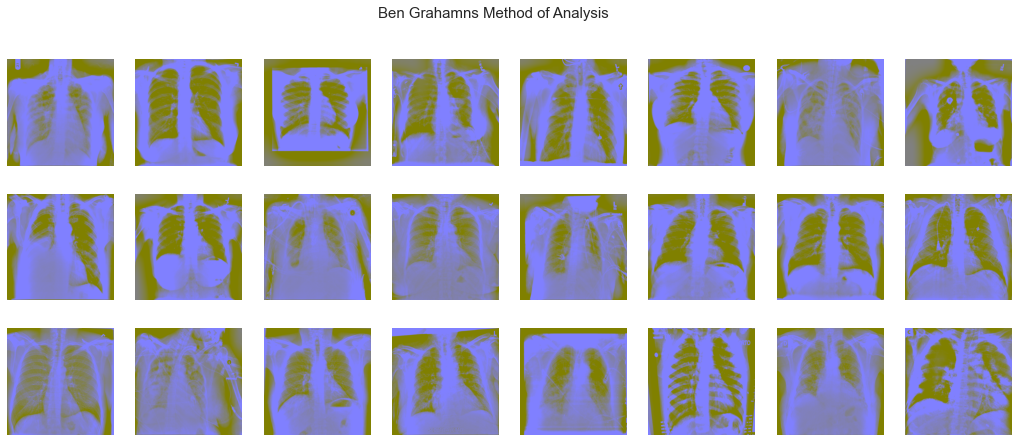

In [79]:
fig = plt.figure(figsize = (18, 7))
fig.suptitle("Ben Grahamns Method of Analysis", fontsize = 15)
columns = 8; rows = 3

for i in range(1, columns*rows +1):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0,0), 512/10), -4, 128)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis(False)

# Statistical Feature Extraction


In [148]:
# We are finding the mean, standard deviation, max value, min value
mean_val = []
std_dev_val = []
max_val = []
min_val = []
samples=int(data.isnull().value_counts())

for i in range(0, samples):
    mean_val.append(data['image'][i].mean())
    std_dev_val.append(np.std(data['image'][i]))
    max_val.append(data['image'][i].max())
    min_val.append(data['image'][i].min())

imageEDA = data.loc[:,['image','Result','path']]
imageEDA['mean'] = mean_val
imageEDA['stedev'] = std_dev_val
imageEDA['max'] = max_val
imageEDA['min'] = min_val

imageEDA['subt_mean'] = imageEDA['mean'].mean() - imageEDA['mean']


<class 'pandas.core.frame.DataFrame'>


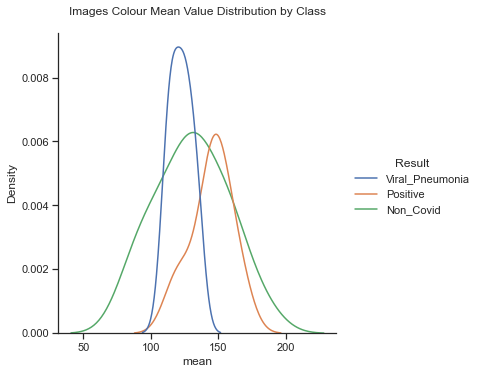

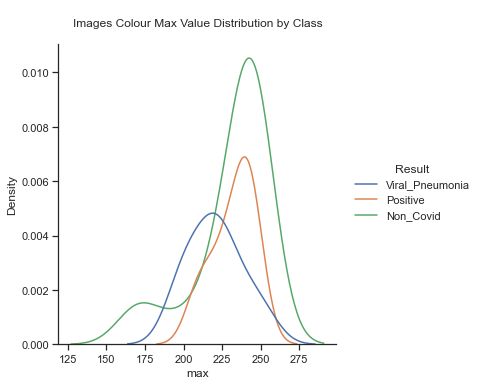

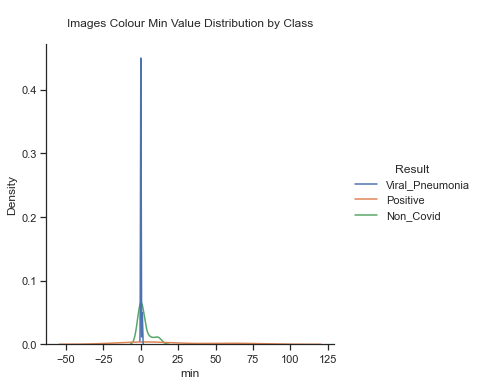

In [120]:
# The Mean vs Density plot insights for pixels:

# The max pixel value for Covid Negative cases is greater than 0.014 and less than 0.016.
# The max pixel value for Covid Positive cases is greater than 0.004 & less than 0.006.
ax1 = sns.displot(data = imageEDA, x = 'mean', kind="kde", hue = 'Result');
plt.title('Images Colour Mean Value Distribution by Class\n', fontsize = 12);


# The Max vs Density plot insights for pixels:

# The max pixel value for Covid Negative cases is greater than 0.035 and less than 0.040.
# The max pixel value for Covid Positive cases is 0.005.
ax2 = sns.displot(data = imageEDA, x = 'max', kind="kde", hue = 'Result');
plt.title('\nImages Colour Max Value Distribution by Class\n', fontsize = 12);


# The Min vs Density plot insights for pixels:

# The max pixel value for Covid Negative cases is greater than 0.4.
# The max pixel value for Covid Positive cases is greater than 0.0 and less than 0.1.
ax3 = sns.displot(data = imageEDA, x = 'min', kind="kde", hue = 'Result');
plt.title('\nImages Colour Min Value Distribution by Class\n', fontsize = 12);

<class 'pandas.core.frame.DataFrame'>


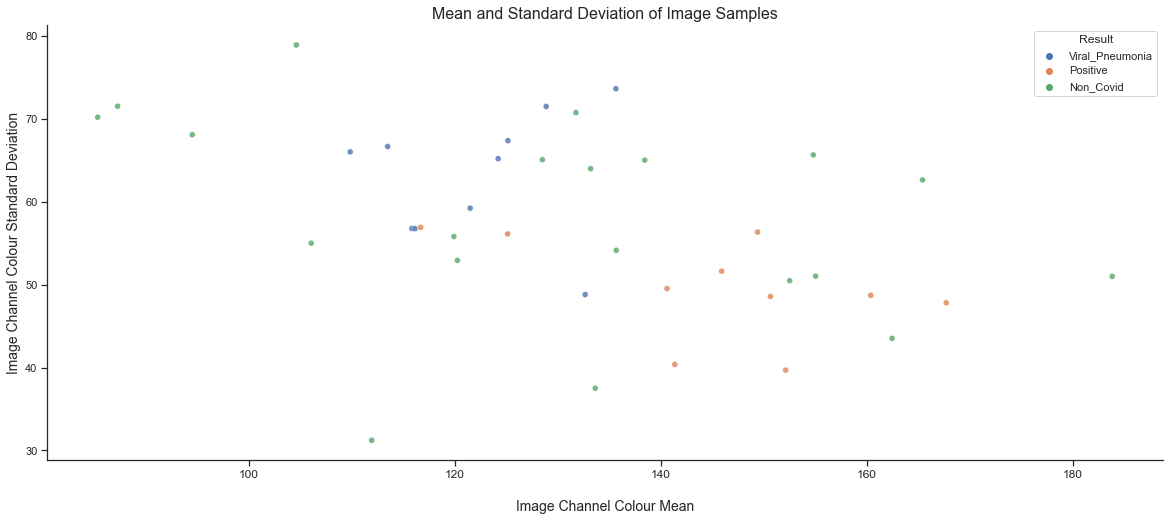

In [121]:
# We observe that there are 2 clusters formed, one for Covid Positive, one for Covid Negative and both have several 
# overlappings. Overlapping Color Mean range: (100 - 175)
# We observe that for pixels having Std Deviation below 30 are all Covid Positive Images (Orange Colored)
plt.figure(figsize = (20, 8))
sns.set(style = "ticks", font_scale = 1)
ax = sns.scatterplot(data = imageEDA, x = "mean", y = imageEDA['stedev'], hue = 'Result', alpha = 0.8);
sns.despine(top = True, right = True, left = False, bottom = False)
plt.xticks(rotation = 0, fontsize = 12)
ax.set_xlabel('\nImage Channel Colour Mean', fontsize = 14)
ax.set_ylabel('Image Channel Colour Standard Deviation', fontsize = 14)
plt.title('Mean and Standard Deviation of Image Samples', fontsize = 16);


<class 'pandas.core.frame.DataFrame'>


<Figure size 720x576 with 0 Axes>

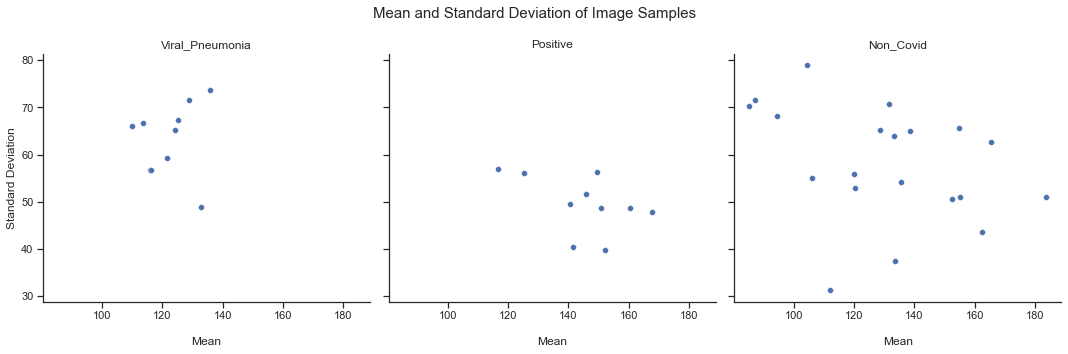

In [122]:
# Comparing both Scatter plots, we observe that Postivie Samples have outliers (pixel points).
plt.figure(figsize = (10, 8));
g = sns.FacetGrid(imageEDA, col = "Result", height = 5);
g.map_dataframe(sns.scatterplot, x = 'mean', y = 'stedev');
g.set_titles(col_template = "{col_name}", row_template= "{row_name}", size = 12);
g.fig.subplots_adjust(top = .7);
g.fig.suptitle('Mean and Standard Deviation of Image Samples', fontsize = 15);
axes = g.axes.flatten();
axes[0].set_ylabel('Standard Deviation');
for ax in axes:
    ax.set_xlabel('\nMean');
g.fig.tight_layout();


# Global Transformation and Moment

In [158]:
# data.iloc[[0]]['HandCrafted_1D_array']=[1,2,3]
# data.iloc[[0]]

import pandas as pd
temp = []
for id in range(data.shape[0]):
    temp.append([1,2,3])

# temp1=data
# temp1['Zernike_1d_array'] = temp
# # temp1 = temp1.append(dict(zip(temp1.columns, temp)), ignore_index=True)
# # temp1.loc[len(data)] = temp
# # data.shape[0]
# print(temp1['Zernike_1d_array'])
data.iloc[1]['path']

'C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset/Viral_Pneumonia/Viral Pneumonia-10.png'

In [172]:
# importing required libraries
import mahotas
import mahotas.demos
from pylab import gray, imshow, show
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
   
# loading image
# img = mahotas.demos.load('nuclear')
temp=[]
for i in range(data.shape[0]):
    img = cv2.imread(data.iloc[i]['path'])
    img = img.max(2)
    value = mahotas.features.zernike_moments(img, 10)
    temp.append(np.array(value, dtype=object))

data['Zernike_1d_array'] = temp

In [175]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Create feature and target arrays
X = data.iloc[:]['Zernike_1d_array']
y = data.iloc[:]['Result']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

# # Predict on dataset which model has not seen before
print(knn.predict(X_test))


ValueError: setting an array element with a sequence.

In [23]:
# Gabor filter 
# https://scikit-image.org/docs/0.11.x/auto_examples/plot_gabor.html
# Please Explain could not understand

Rotated images matched against references using Gabor filter banks:
original: brick, rotated: 30deg, match result: Normal
original: brick, rotated: 70deg, match result: Covid


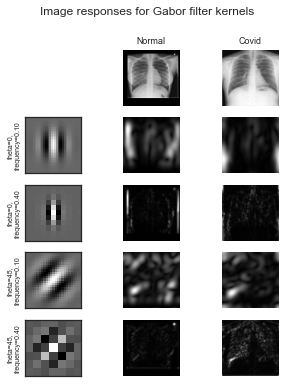

In [25]:
from __future__ import print_function

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as nd
from PIL import Image

from skimage import data
from skimage.util import img_as_float
from skimage.filters import gabor_kernel


def compute_feats(image, kernels):
    feats = np.zeros((len(kernels), 2), dtype=np.double)
    for k, kernel in enumerate(kernels):
        filtered = nd.convolve(image, kernel, mode='wrap')
        feats[k, 0] = filtered.mean()
        feats[k, 1] = filtered.var()
    return feats


def match(feats, ref_feats):
    min_error = np.inf
    min_i = None
    for i in range(ref_feats.shape[0]):
        error = np.sum((feats - ref_feats[i, :])**2)
        if error < min_error:
            min_error = error
            min_i = i
    return min_i


# prepare filter bank kernels
kernels = []
for theta in range(4):
    theta = theta / 4. * np.pi
    for sigma in (1, 3):
        for frequency in (0.05, 0.25):
            kernel = np.real(gabor_kernel(frequency, theta=theta,sigma_x=sigma, sigma_y=sigma))
            kernels.append(kernel)


shrink = (slice(0, None, 3), slice(0, None, 3))
img1 = Image.open("C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset/Normal/Normal-1.png").convert('L')
img2 = Image.open("C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset/COVID/COVID-1003.png").convert('L')

Normal = img_as_float(img1)[shrink]
Covid = img_as_float(img2)[shrink]
image_names = ('Normal', 'Covid')
images = (Normal, Covid)

# prepare reference features
ref_feats = np.zeros((3, len(kernels), 2), dtype=np.double)
ref_feats[0, :, :] = compute_feats(Normal, kernels)
ref_feats[1, :, :] = compute_feats(Covid, kernels)

print('Rotated images matched against references using Gabor filter banks:')

print('original: brick, rotated: 30deg, match result: ', end='')
feats = compute_feats(nd.rotate(Normal, angle=190, reshape=False), kernels)
print(image_names[match(feats, ref_feats)])

print('original: brick, rotated: 70deg, match result: ', end='')
feats = compute_feats(nd.rotate(Covid, angle=70, reshape=False), kernels)
print(image_names[match(feats, ref_feats)])


def power(image, kernel):
    # Normalize images for better comparison.
    image = (image - image.mean()) / image.std()
    return np.sqrt(nd.convolve(image, np.real(kernel), mode='wrap')**2 +
                   nd.convolve(image, np.imag(kernel), mode='wrap')**2)

# Plot a selection of the filter bank kernels and their responses.
results = []
kernel_params = []
for theta in (0, 1):
    theta = theta / 4. * np.pi
    for frequency in (0.1, 0.4):
        kernel = gabor_kernel(frequency, theta=theta)
        params = 'theta=%d,\nfrequency=%.2f' % (theta * 180 / np.pi, frequency)
        kernel_params.append(params)
        # Save kernel and the power image for each image
        results.append((kernel, [power(img, kernel) for img in images]))

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(5, 6))
plt.gray()

fig.suptitle('Image responses for Gabor filter kernels', fontsize=12)

axes[0][0].axis('off')

# Plot original images
for label, img, ax in zip(image_names, images, axes[0][1:]):
    ax.imshow(img)
    ax.set_title(label, fontsize=9)
    ax.axis('off')

for label, (kernel, powers), ax_row in zip(kernel_params, results, axes[1:]):
    # Plot Gabor kernel
    ax = ax_row[0]
    ax.imshow(np.real(kernel), interpolation='nearest')
    ax.set_ylabel(label, fontsize=7)
    ax.set_xticks([])
    ax.set_yticks([])

#   Plot Gabor responses with the contrast normalized for each filter
#     vmin = np.min(powers)
#     vmax = np.max(powers)
    for patch, ax in zip(powers, ax_row[1:]):
        ax.imshow(patch)
        ax.axis('off')

plt.show()

In [14]:
# importing required libraries
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
from PIL import Image


#reading the image
# img = Image.open("C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset/Normal/Normal-1.png").convert('L')
img = imread('C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset/COVID/COVID-52.png')
#resize image
resized_img = resize(img, (128,64))

#generating HOG features
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, multichannel=False)

print('\n\nShape of Image Features\n\n')
print(fd.shape)



Shape of Image Features


(3780,)


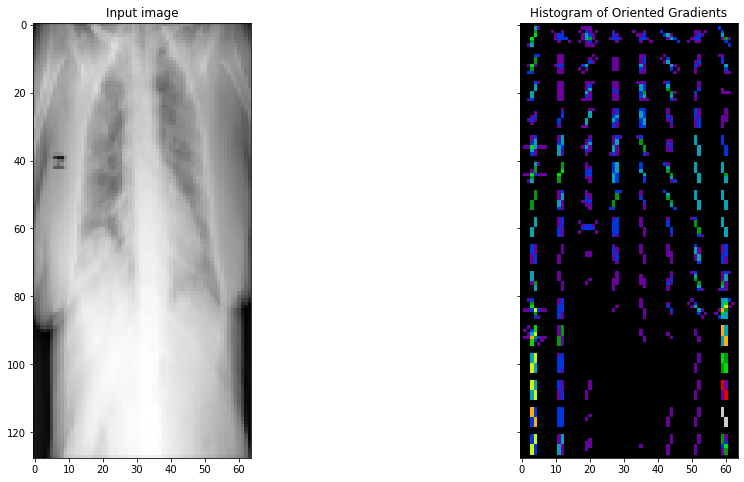

In [22]:
# Histogram of Oriented Gradients (HOG) Feature
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8 ), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.get_cmap('nipy_spectral',10)) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

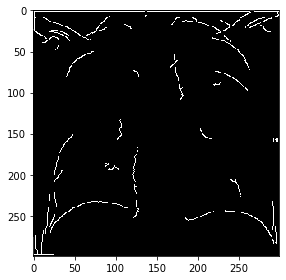

In [24]:
import cv2
import numpy as np
img_load = cv2.imread("C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset/COVID/COVID-1002.png")
edges_of_image = cv2.Canny(img_load,100,200)
imshow(edges_of_image)

In [3]:
# SURF
import cv2
import numpy as np
img = cv2.imread('C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset/COVID/COVID-1002.png',0)
surf = cv2.xfeatures2d.SURF_create(400)

AttributeError: module 'cv2' has no attribute 'SIFT_create'

In [20]:
import cv2
surf = cv2.xfeatures2d.SURF_create()

AttributeError: module 'cv2' has no attribute 'xfeatures2d'